Saving 서울대기오염_2019 Sheet1.csv to 서울대기오염_2019 Sheet1 (14).csv
업로드된 파일: 서울대기오염_2019 Sheet1 (14).csv
미세먼지               41.761670
초미세먼지              24.930957
오존                  0.024773
이산화질소 NO2 (ppm)     0.028071
일산화탄소 CO (ppm)      0.530593
아황산가스 SO2(ppm)      0.003951
dtype: float64
         미세먼지      초미세먼지        오존  이산화질소 NO2 (ppm)  일산화탄소 CO (ppm)  \
계절                                                                    
가을  31.155609  15.719123  0.018790         0.026757        0.498849   
겨울  54.666072  33.655219  0.013593         0.036843        0.703041   
봄   54.087826  31.559565  0.033397         0.030114        0.517913   
여름  26.337291  18.146737  0.032566         0.018668        0.401424   

    아황산가스 SO2(ppm)  
계절                  
가을        0.003322  
겨울        0.004539  
봄         0.004328  
여름        0.003578  


<ipython-input-54-50972b4065e6>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='측정소명', y='공기질_가중스코어', data=df.sort_values(by='공기질_가중스코어'), palette='coolwarm')


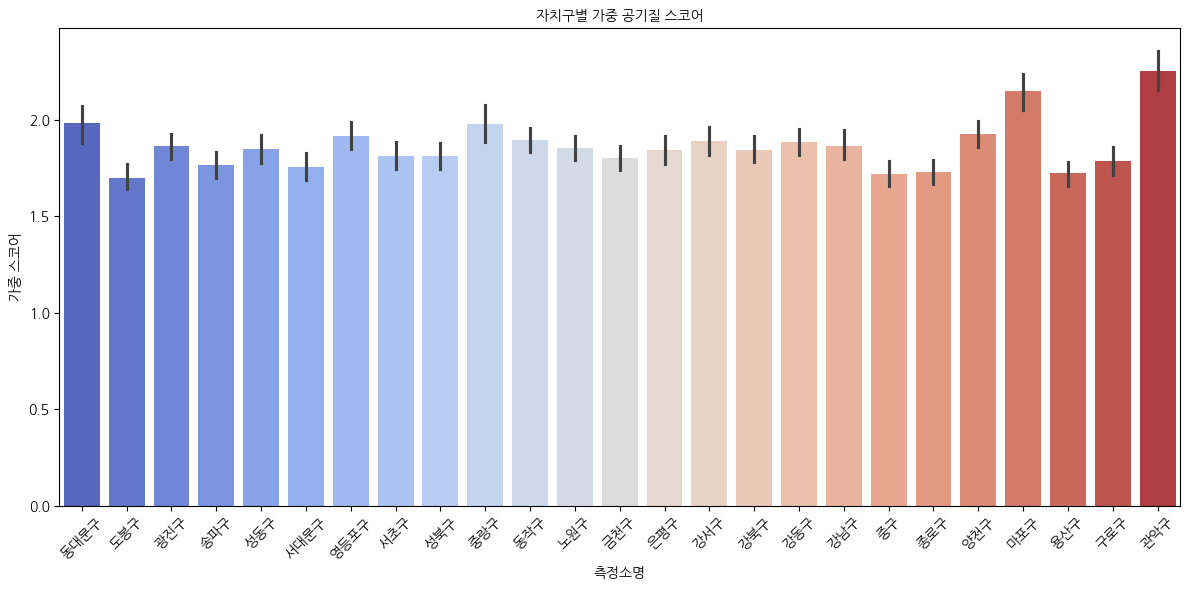

<ipython-input-54-50972b4065e6>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='위험지역', data=df, palette='Set2')


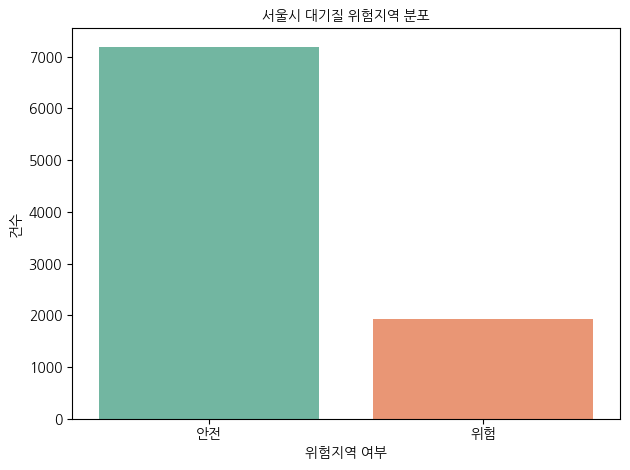

<ipython-input-54-50972b4065e6>:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='계절', y='미세먼지', data=df, estimator='mean', palette='pastel')


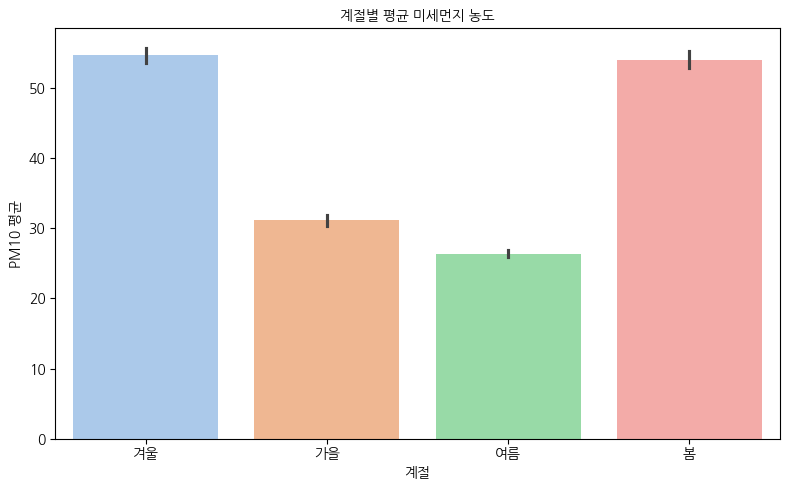

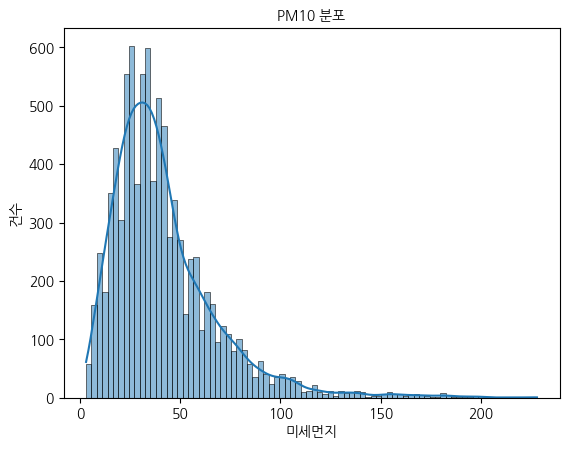

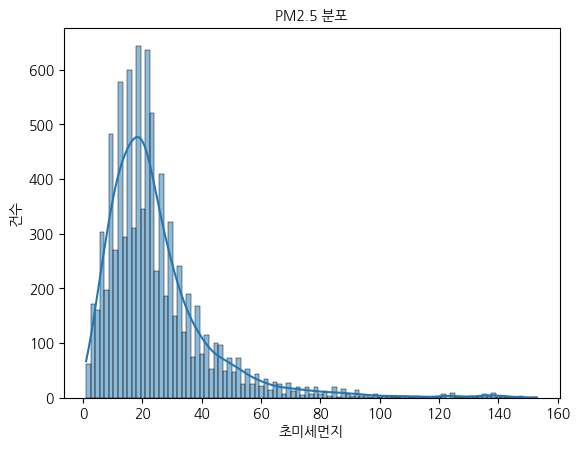

In [54]:
!apt-get -qq install -y fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import seaborn as sns

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)
plt.rc('font', family=fontprop.get_name())
plt.rcParams['axes.unicode_minus'] = False

from google.colab import files
uploaded = files.upload()

import os
filename = list(uploaded.keys())[0]
print(f"업로드된 파일: {filename}")

if filename.endswith('.csv'):
    df = pd.read_csv(filename)
elif filename.endswith('.xlsx'):
    df = pd.read_excel(filename)
else:
    raise ValueError("지원하지 않는 파일 형식입니다.")

df = df[df['측정소명'] != '평균'].reset_index(drop=True)
df.columns = df.columns.str.strip().str.replace('\n', ' ')

def pm10_grade(val):
    if val <= 30: return '좋음'
    elif val <= 80: return '보통'
    elif val <= 150: return '나쁨'
    else: return '매우 나쁨'

def pm25_grade(val):
    if val <= 15: return '좋음'
    elif val <= 35: return '보통'
    elif val <= 75: return '나쁨'
    else: return '매우 나쁨'

df['PM10_등급'] = df['미세먼지'].apply(pm10_grade)
df['PM25_등급'] = df['초미세먼지'].apply(pm25_grade)

df['위험지역'] = df.apply(
    lambda row: '위험' if (row['PM10_등급'] in ['나쁨', '매우 나쁨']) or (row['PM25_등급'] in ['나쁨', '매우 나쁨']) else '안전',
    axis=1
)

grade_score = {'좋음': 1, '보통': 2, '나쁨': 3, '매우 나쁨': 4}
df['PM10_점수'] = df['PM10_등급'].map(grade_score)
df['PM25_점수'] = df['PM25_등급'].map(grade_score)
df['공기질_가중스코어'] = df['PM10_점수'] * 0.4 + df['PM25_점수'] * 0.6

def 위험등급(score):
    if score >= 3.5: return '고위험'
    elif score >= 2.5: return '중간위험'
    else: return '저위험'

df['공기질_위험등급'] = df['공기질_가중스코어'].apply(위험등급)

df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce')
df['월'] = df['날짜'].dt.month
df['계절'] = df['월'].map({
    12: '겨울', 1: '겨울', 2: '겨울',
    3: '봄', 4: '봄', 5: '봄',
    6: '여름', 7: '여름', 8: '여름',
    9: '가을', 10: '가을', 11: '가을'
})

pollutants = [
    '미세먼지',
    '초미세먼지',
    '오존',
    '이산화질소 NO2 (ppm)',
    '일산화탄소 CO (ppm)',
    '아황산가스 SO2(ppm)'
]

print(df[pollutants].mean())
print(df.groupby('계절')[pollutants].mean())

plt.figure(figsize=(12, 6))
sns.barplot(x='측정소명', y='공기질_가중스코어', data=df.sort_values(by='공기질_가중스코어'), palette='coolwarm')
plt.title("자치구별 가중 공기질 스코어", fontproperties=fontprop)
plt.xlabel("측정소명", fontproperties=fontprop)
plt.ylabel("가중 스코어", fontproperties=fontprop)
plt.xticks(rotation=45, fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.tight_layout()
plt.show()

sns.countplot(x='위험지역', data=df, palette='Set2')
plt.title("서울시 대기질 위험지역 분포", fontproperties=fontprop)
plt.xlabel("위험지역 여부", fontproperties=fontprop)
plt.ylabel("건수", fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='계절', y='미세먼지', data=df, estimator='mean', palette='pastel')
plt.title("계절별 평균 미세먼지 농도", fontproperties=fontprop)
plt.xlabel("계절", fontproperties=fontprop)
plt.ylabel("PM10 평균", fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.tight_layout()
plt.show()

sns.histplot(df['미세먼지'], kde=True)
plt.title("PM10 분포", fontproperties=fontprop)
plt.xlabel("미세먼지", fontproperties=fontprop)
plt.ylabel("건수", fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.show()

sns.histplot(df['초미세먼지'], kde=True)
plt.title("PM2.5 분포", fontproperties=fontprop)
plt.xlabel("초미세먼지", fontproperties=fontprop)
plt.ylabel("건수", fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.show()


In [24]:
!pip install scikit-learn --quiet


In [32]:
import pandas as pd
from sklearn.impute import KNNImputer

df.columns = df.columns.str.strip()

print("컬럼명 목록 확인:", df.columns.tolist())

target_cols = [
    '미세먼지',
    '초미세먼지',
    '오존',
    '이산화질소 NO2 (ppm)',
    '일산화탄소 CO (ppm)',
    '아황산가스 SO2 (ppm)'
]


neighbor_map = {
    '강남구': ['서초구', '송파구', '강동구'],
    '서초구': ['강남구', '동작구', '관악구'],
    '송파구': ['강남구', '강동구', '광진구'],
    '강동구': ['송파구', '광진구', '중랑구'],
    '광진구': ['중랑구', '성동구', '강동구'],
    '성동구': ['광진구', '동대문구', '중구'],
    '동대문구': ['성북구', '중랑구', '성동구'],
    '중랑구': ['노원구', '동대문구', '강동구'],
    '노원구': ['도봉구', '중랑구', '성북구'],
    '성북구': ['강북구', '종로구', '동대문구'],
    '강북구': ['성북구', '도봉구'],
    '도봉구': ['노원구', '강북구'],
    '중구': ['종로구', '용산구', '성동구'],
    '종로구': ['중구', '성북구', '은평구'],
    '용산구': ['중구', '마포구', '서대문구'],
    '마포구': ['서대문구', '은평구', '용산구'],
    '서대문구': ['마포구', '은평구', '중구'],
    '은평구': ['서대문구', '마포구', '종로구'],
    '관악구': ['동작구', '서초구', '금천구'],
    '동작구': ['관악구', '서초구', '영등포구'],
    '금천구': ['관악구', '구로구'],
    '구로구': ['금천구', '영등포구', '양천구'],
    '영등포구': ['구로구', '동작구', '양천구'],
    '양천구': ['영등포구', '구로구', '강서구'],
    '강서구': ['양천구', '마포구'],
}

def knn_impute_by_date(df, feature_cols, n_neighbors=3):
    result = []
    for date, group in df.groupby('날짜'):
        sub_result = []
        for gu in group['측정소명'].unique():
            related = neighbor_map.get(gu, []) + [gu]
            sub_df = group[group['측정소명'].isin(related)].copy()
            idx = sub_df.index

            valid_feature_cols = [col for col in feature_cols if col in sub_df.columns]
            if not valid_feature_cols:
                print(f"⚠️ {date}, {gu}에서 사용 가능한 컬럼 없음. 스킵.")
                sub_result.append(sub_df)
                continue

            if sub_df[valid_feature_cols].isnull().values.any():
                current_n_neighbors = min(n_neighbors, len(sub_df) - 1)
                if current_n_neighbors < 1:
                    print(f"⚠️ {date}, {gu}에서 데이터 부족 (샘플 {len(sub_df)}개). 스킵.")
                    sub_result.append(sub_df)
                    continue

                imputer = KNNImputer(n_neighbors=current_n_neighbors)
                imputed = imputer.fit_transform(sub_df[valid_feature_cols])
                sub_df[valid_feature_cols] = imputed

            sub_df.index = idx
            sub_result.append(sub_df)
        if sub_result:
            result.append(pd.concat(sub_result))
    return pd.concat(result).sort_index() if result else df

df_imputed = knn_impute_by_date(df, feature_cols=target_cols, n_neighbors=3)


컬럼명 목록 확인: ['날짜', '측정소명', '미세먼지', '초미세먼지', '오존', '이산화질소\nNO2 (ppm)', '일산화탄소\nCO (ppm)', '아황산가스\nSO2(ppm)', 'PM10_등급', 'PM25_등급', '위험지역', '공기질_스코어']


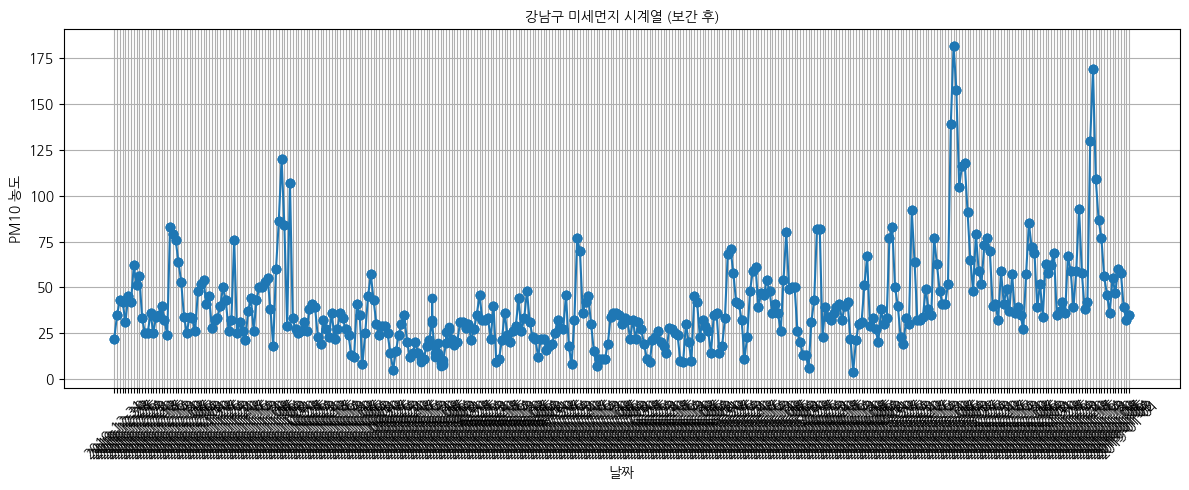

In [43]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

gangnam = df_imputed[df_imputed['측정소명'] == '강남구']

plt.figure(figsize=(12, 5))
plt.plot(gangnam['날짜'], gangnam['미세먼지'], marker='o')

plt.title("강남구 미세먼지 시계열 (보간 후)", fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("PM10 농도", fontproperties=font_prop)

plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.grid(True)
plt.tight_layout()
plt.show()
